<a href="https://colab.research.google.com/github/yoojinlee-hub/Practice_python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%80%84%EB%A6%AC%ED%8B%B0%20%EB%86%92%EC%9D%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터 퀄리티<br>**
*완결성(필수적인 데이터는 모두 기록되어야 함)*-결측값(채워져야 하는데 비워져 있는 곳,NaN) 확인,<br>
*유일성(불필요한 중복X)*,<br>
*통일성(데이터가 동일한 형식으로 저장되어야 함)*,<br>
*정확성(데이터가 정확해야 함)*-이상점(Outlier)확인



---
**데이터 클리닝**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


완결성 확인 및 수정 // 결측값

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/attendance.csv',index_col=0)
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [3]:
#NaN : not a number 찾기
df.isnull()

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,False,False,False,False,False
2009,False,False,False,False,False
2010,False,False,True,False,False
2011,False,False,False,False,False
2012,False,False,True,False,False
2013,False,False,True,False,False
2014,False,False,False,False,False
2015,False,False,False,False,False
2016,False,False,False,False,False


In [4]:
#NaN : not a number 찾기
df.isnull().sum()

야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

In [5]:
#해결방법 - 값 지워버리기
df.dropna() #기존 데이터프레임 건드리지 않음
#df.dropna(inplace=True) 기존데이터 건드리기

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [6]:
df.dropna(axis='columns') #결측값이 있는 column 제거

,야구,축구,남자농구,여자농구
연도,,,,
2008,10881,11642,4208,1329
2009,11562,10983,4152,1206
2010,11402,12873,3870,705
2011,13055,10709,3955,1445
2012,13747,7157,4537,1150
2013,11373,7656,4092,1237
2014,11429,8115,4458,1417
2015,10357,7720,3953,1480
2016,11583,7854,3543,1425


In [7]:
df.fillna(0) #결측값을 다른 값으로 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,0.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,0.0,4537,1150
2013,11373,7656,0.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [8]:
df.mean() #평균

야구      11705.700000
축구       9121.100000
배구       1933.857143
남자농구     3995.600000
여자농구     1249.100000
dtype: float64

In [11]:
df.fillna(df.mean())

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.000000,4208,1329
2009,11562,10983,1471.000000,4152,1206
2010,11402,12873,1933.857143,3870,705
2011,13055,10709,1774.000000,3955,1445
2012,13747,7157,1933.857143,4537,1150
2013,11373,7656,1933.857143,4092,1237
2014,11429,8115,1967.000000,4458,1417
2015,10357,7720,2311.000000,3953,1480
2016,11583,7854,2336.000000,3543,1425


In [10]:
df.median() #중간값

야구      11495.5
축구       7984.5
배구       1967.0
남자농구     4023.5
여자농구     1283.0
dtype: float64

In [12]:
df.fillna(df.median())

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,1967.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,1967.0,4537,1150
2013,11373,7656,1967.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


유일성

In [13]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dust.csv',index_col=0)
df.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18


In [14]:
df.index

Index(['08월 11일', '08월 10일', '08월 09일', '08월 08일', '08월 07일', '08월 06일',
       '08월 05일', '08월 04일', '08월 03일', '08월 02일', '08월 01일', '07월 31일',
       '07월 31일', '07월 30일', '07월 29일', '07월 28일', '07월 27일', '07월 26일',
       '07월 25일', '07월 24일', '07월 23일', '07월 22일', '07월 21일', '07월 20일',
       '07월 19일', '07월 18일', '07월 17일', '07월 16일', '07월 15일', '07월 14일',
       '07월 13일'],
      dtype='object', name='날짜')

In [15]:
df.index.value_counts()

07월 31일    2
07월 15일    1
07월 21일    1
07월 26일    1
07월 24일    1
07월 13일    1
08월 05일    1
07월 20일    1
07월 16일    1
07월 19일    1
07월 27일    1
08월 03일    1
07월 17일    1
07월 23일    1
08월 02일    1
07월 29일    1
08월 11일    1
08월 04일    1
07월 30일    1
07월 25일    1
07월 22일    1
08월 07일    1
08월 09일    1
07월 14일    1
07월 18일    1
07월 28일    1
08월 01일    1
08월 06일    1
08월 08일    1
08월 10일    1
Name: 날짜, dtype: int64

In [16]:
df.loc['07월 31일']

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


In [17]:
df.drop_duplicates() #중복된 row 삭제 , 기존 df 건드리지 않음

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


In [19]:
df.drop_duplicates(inplace=True)
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


In [20]:
df.T #row와 colum이 바뀜

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,08월 01일,07월 31일,07월 30일,07월 29일,07월 28일,07월 27일,07월 26일,07월 25일,07월 24일,07월 23일,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,33,18,10,18,39,48,41,32,42,31,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,26,26,28,29,38,51,55,40,33,31,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,22,17,14,16,29,41,36,30,31,25,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,40,23,15,22,41,39,39,31,37,28,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,24,23,18,28,37,30,30,29,20,21,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,18,17,14,23,44,41,29,26,33,26,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,26,23,24,30,30,57,60,46,44,33,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,35,21,14,20,40,47,39,31,42,35,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,20,19,17,22,37,45,37,39,39,41,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,26,20,15,26,50,52,37,35,49,37,48,59,51,47,47,43,38,24,23,24


In [27]:
df=df.T.drop_duplicates().T

In [28]:
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26


정확성

In [ ]:
#이상점 판단 기준 : 박스플롯의 . <1.5 IQR>
#절대적인 기준은 없음
#고치거나 제거 // 분석에 방해가 되면 제거, 의미있으면 그냥 둔다.

In [68]:
df = pd.read_csv('/content/drive/MyDrive/beer.csv', index_col=0)
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
...,...,...,...,...,...,...,...
2247,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2248,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2249,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


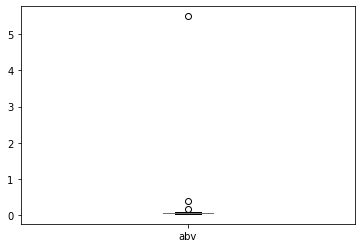

In [31]:
df.plot(kind='box',y='abv')

In [32]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [33]:
df['abv'].quantile(0.25)

0.05

In [69]:
q1 = df['abv'].quantile(0.75)
q3 = df['abv'].quantile(0.25)
iqr = q1 - q3 #IQR

In [70]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)

In [71]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
9,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
16,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0
17,0.082,NaN,1592,He Said Belgian-Style Tripel,Tripel,368,12.0
...,...,...,...,...,...,...,...
2240,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0
2243,0.042,NaN,1345,Patty's Chile Beer,Chile Beer,424,12.0
2244,0.082,NaN,1316,Colorojo Imperial Red Ale,American Strong Ale,424,12.0
2246,0.075,NaN,1035,Rocky Mountain Oyster Stout,American Stout,424,12.0


In [46]:
df.loc[2250,'abv']=0.055

In [72]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
9,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
16,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0
17,0.082,NaN,1592,He Said Belgian-Style Tripel,Tripel,368,12.0
...,...,...,...,...,...,...,...
2240,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0
2243,0.042,NaN,1345,Patty's Chile Beer,Chile Beer,424,12.0
2244,0.082,NaN,1316,Colorojo Imperial Red Ale,American Strong Ale,424,12.0
2246,0.075,NaN,1035,Rocky Mountain Oyster Stout,American Stout,424,12.0


In [52]:
df[condition].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251],
           dtype='int64', length=2190)

In [54]:
df.drop(df[condition].index,inplace=True)

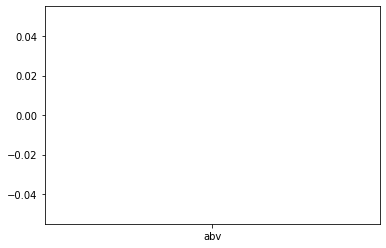

In [55]:
df.plot(kind='box',y='abv')

관계적 이상점

In [56]:
df = pd.read_csv('/content/drive/MyDrive/exam_outlier.csv')

In [57]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [58]:
df['writing score']>100

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: writing score, Length: 1000, dtype: bool

In [59]:
df[df['writing score']>100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [61]:
df.drop(51,inplace=True)

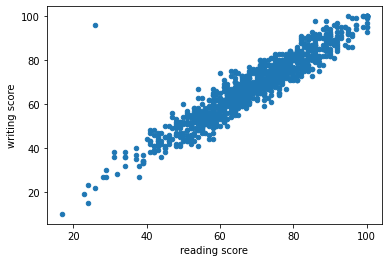

In [62]:
df.plot(kind='scatter',x='reading score',y='writing score')

In [63]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [64]:
condition = (df['writing score']>90) & (df['reading score']<40)
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [65]:
df.drop(373,inplace=True)

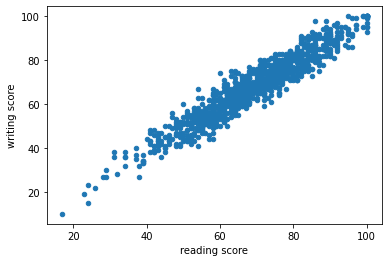

In [66]:
df.plot(kind='scatter',x='reading score',y='writing score')

In [67]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817735,0.802722
reading score,0.817735,1.000000,0.954440
writing score,0.802722,0.954440,1.000000
